# RELATÓRIO TRABALHO-ICD

### Análise de dados das gravidezes entre 1960 e 1967 entre mulheres no Plano de Saúde da Fundação Kaiser na área da Baía Leste de São Francisco

### Alunos:

Janine de França Freire

Vladimir Yuri Farias de Lima Cavalcanti

Yasmin Kely Lucena Medeiros

### ======================================================================================

# INTRODUÇÃO


A motivação desse trabalho foi para todos nós, os dados que esse dataset contém. Pois são dados muito interessantes( mesmo que sejam antigos), são muitos dados de diferentes grandezas que são interessantes de serem trabalhados. Além disso, o dataset é bastante limpo e tem uma fácil vizualização dos dados.

E também por ser tratar de uma dataset que leva em consideração dados de gestações, que contém tanto dados dos bebês quanto das mães, e ao analisar esses dados podem ser muito importantes em prever como serão aspectos de algumas gestações e também como essa análise irá ajudar algumas gestações futuras. Então de modo geral o objetivo da análise seria prever como certas condições da mãe podem afetar a gestação e o bebê.



### ========================================================================================

# DADOS USADOS

Os dados utilizados estão disponiveis em um site clicando no link abaixo.

[Clique aqui](https://www.openintro.org/data/index.php?data=babies)

Os dados utilizados foram de um dataset chamado "babies" que foi um estudo, em particular, considerou todas as gestações entre 1960 e 1967 entre mulheres no Plano de Saúde da Fundação Kaiser na área da Baía Leste de São Francisco.

Que contém as seguinte variáveis:

## Variáveis: 

case - id number

bwt - birthweight, in ounces

gestation - length of gestation, in days

parity - binary indicator for a first pregnancy (0=first pregnancy)

age - mother's age in years

height - mother's height in inches

weight - mother's weight in pounds

smoke - binary indicator for whether the mother smokes

### A princípio nós começamos importando o dataset como um dataframe para o notebook usando o a biblioteca Pandas:




In [1]:
#Importanto e printando o dataset como um Dataframe
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#babies = pd.read_csv("babies.csv")
babies = pd.read_csv('babies.csv')
babies

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


### ========================================================================================

# PRÉ-PROCESSAMENTO

#### Em relação à limpeza e a transformação dos dados, a primeira transformação a ser feita foi a de mudar o nome das colunas do dataframe para nomes mais fáceis de serem vizualizados

In [2]:
babies = babies.drop(labels='case',axis=1)

babies.columns = ['Weight Baby(ounces)','Length of Gestation(days)','Was the First Pegrancy',"Mother's Age","Mother's Height(inches)","Mother's Weigth(pounds)",'Is The Mother a Smoker']

babies

,Weight Baby(ounces),Length of Gestation(days),Was the First Pegrancy,Mother's Age,Mother's Height(inches),Mother's Weigth(pounds),Is The Mother a Smoker
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
3,123,NaN,0,36.0,69.0,190.0,0.0
4,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...
1231,113,275.0,1,27.0,60.0,100.0,0.0
1232,128,265.0,0,24.0,67.0,120.0,0.0
1233,130,291.0,0,30.0,65.0,150.0,1.0
1234,125,281.0,1,21.0,65.0,110.0,0.0


#### 1º Passo: Transformar os dados binários das colunas 'Was the First Pregnancy' e 'Is The Mother a Smoker' em Yes/Not, para também ficar mais fácil essa vizualização dos dados.

In [3]:
arrCategoryColumns = [x for x in babies.columns  if babies[x].max() == 1 and babies[x].min() == 0]
arrCategoryColumns


for x in range(len(babies['Was the First Pegrancy'])):
    if(babies.loc[x,'Was the First Pegrancy']) == 0:
        babies.loc[x,'Was the First Pegrancy']='Yes'
    else:
        babies.loc[x,'Was the First Pegrancy'] = 'No'
        
for x in range(len(babies['Is The Mother a Smoker'])):
    if(babies.loc[x,'Is The Mother a Smoker']) == 1:
        babies.loc[x,'Is The Mother a Smoker']='Yes'
    else:
        babies.loc[x,'Is The Mother a Smoker'] = 'No'
        
babies


,Weight Baby(ounces),Length of Gestation(days),Was the First Pegrancy,Mother's Age,Mother's Height(inches),Mother's Weigth(pounds),Is The Mother a Smoker
0,120,284.0,Yes,27.0,62.0,100.0,No
1,113,282.0,Yes,33.0,64.0,135.0,No
2,128,279.0,Yes,28.0,64.0,115.0,Yes
3,123,NaN,Yes,36.0,69.0,190.0,No
4,108,282.0,Yes,23.0,67.0,125.0,Yes
...,...,...,...,...,...,...,...
1231,113,275.0,No,27.0,60.0,100.0,No
1232,128,265.0,Yes,24.0,67.0,120.0,No
1233,130,291.0,Yes,30.0,65.0,150.0,Yes
1234,125,281.0,No,21.0,65.0,110.0,No


#### 2º Passo: Algumas medidas de certas colunas estão em medidas pouco conhecidas pro usuários brasileiros, como a medida Inches em 'Mother's Height', a medida Ounce em 'Weight Baby' e a medida Pounds em 'Mother's Weight', nesse passo nós iremos mudar essas medidas para medidas conhecidas como Centímetros e Quilos.

In [4]:
#Mudando medida em Ounces para Kg | 1 Ounce =~ 0,028 Kg |
babies["Weight Baby(ounces)"] = babies["Weight Baby(ounces)"] * 28/1000

In [5]:
#Mudando medida em Pounds para Kg | 1 Pound =~ 0,45 Kg |
babies["Mother's Weigth(pounds)"] = babies["Mother's Weigth(pounds)"] * 45/100

In [6]:
#Mudando medida em Inches para Cm | 1 Inche =~ 2,54 Cm |
babies["Mother's Height(inches)"] = babies["Mother's Height(inches)"] * 254/100

#### Ajustando o nome das colunas para as novas medidas

In [7]:
babies.columns = ['Weight Baby(Kg)','Length of Gestation(days)','Was the First Pegrancy',"Mother's Age","Mother's Height(Cm)","Mother's Weigth(Kg)",'Is The Mother a Smoker']

babies

,Weight Baby(Kg),Length of Gestation(days),Was the First Pegrancy,Mother's Age,Mother's Height(Cm),Mother's Weigth(Kg),Is The Mother a Smoker
0,3.360,284.0,Yes,27.0,157.48,45.00,No
1,3.164,282.0,Yes,33.0,162.56,60.75,No
2,3.584,279.0,Yes,28.0,162.56,51.75,Yes
3,3.444,NaN,Yes,36.0,175.26,85.50,No
4,3.024,282.0,Yes,23.0,170.18,56.25,Yes
...,...,...,...,...,...,...,...
1231,3.164,275.0,No,27.0,152.40,45.00,No
1232,3.584,265.0,Yes,24.0,170.18,54.00,No
1233,3.640,291.0,Yes,30.0,165.10,67.50,Yes
1234,3.500,281.0,No,21.0,165.10,49.50,No


### ========================================================================================

# ANÁLISE EXPLORATÓRIA DE DADOS

#### O principal objetivo desta seção é visualizar com os dados estão dispostos, e tirar conclusões a partir destes.



#### Inicialmente foi convertido os valores categóricos em flags

In [8]:
for x in range(len(babies['Is The Mother a Smoker'])):
    if babies.loc[x,'Is The Mother a Smoker'] =='Yes':
        babies['Is The Mother a Smoker - Flag'] = 1
    else:
        babies['Is The Mother a Smoker - Flag'] = 0
        
for x in range(len(babies['Was the First Pegrancy'])):
    if babies.loc[x,'Was the First Pegrancy'] =='Yes':
        babies['Was the First Pegrancy - Flag'] = 1
    else:
        babies['Was the First Pegrancy - Flag'] = 0

#### Plotando gráficos que expõe o número de casos em que acontecem as diferentes situações.

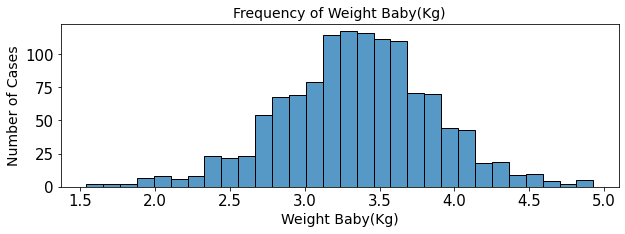

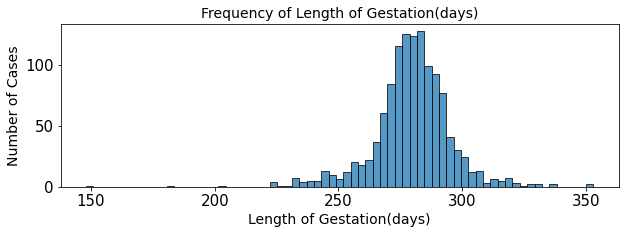

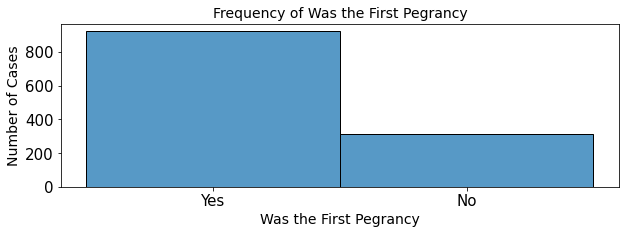

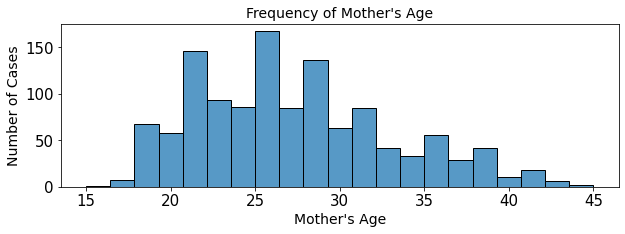

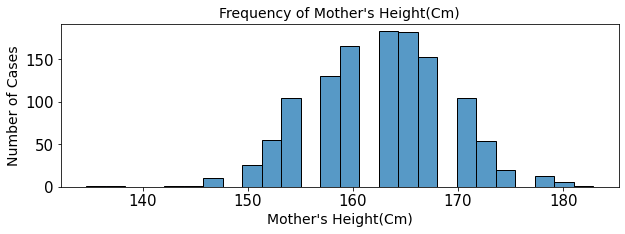

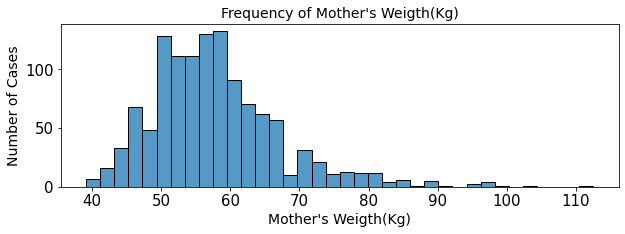

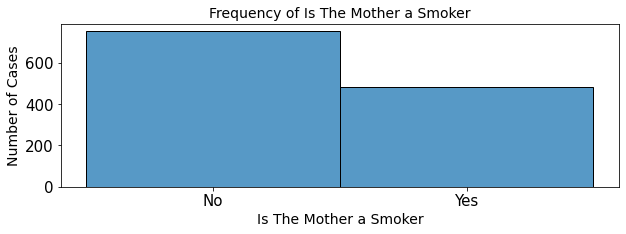

In [9]:
import seaborn as sns
arrCategoryColumns =['Is The Mother a Smoker - Flag', 'Was the First Pegrancy - Flag']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


for x in babies.drop(labels=arrCategoryColumns,axis=1).columns:
    plt.figure(figsize=(10,3))
    sns.histplot(x=x,data=babies, palette='pastel')
    plt.tick_params(labelsize=15)
    plt.ylabel('Number of Cases',fontsize=14)
    plt.xlabel('{}'.format(x),fontsize=14)
    plt.title('Frequency of {}'.format(x),fontsize=14)
    plt.show()

#### Representando as variáveis categóricas

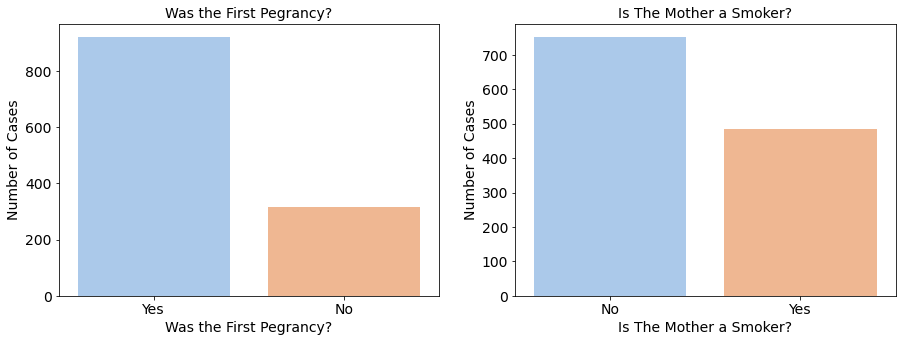

In [10]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
i=0
for x in ['Was the First Pegrancy', 'Is The Mother a Smoker']:

        sns.countplot(x=x,data=babies,palette='pastel',ax=ax[i])
        ax[i].set_xlabel('{}?'.format(x),fontsize=14)
        ax[i].set_ylabel('Number of Cases'.format(x),fontsize=14)
        ax[i].set_title('{}?'.format(x),fontsize=14)
        i+=1
plt.show()

#### Explorando a relação entre os dados

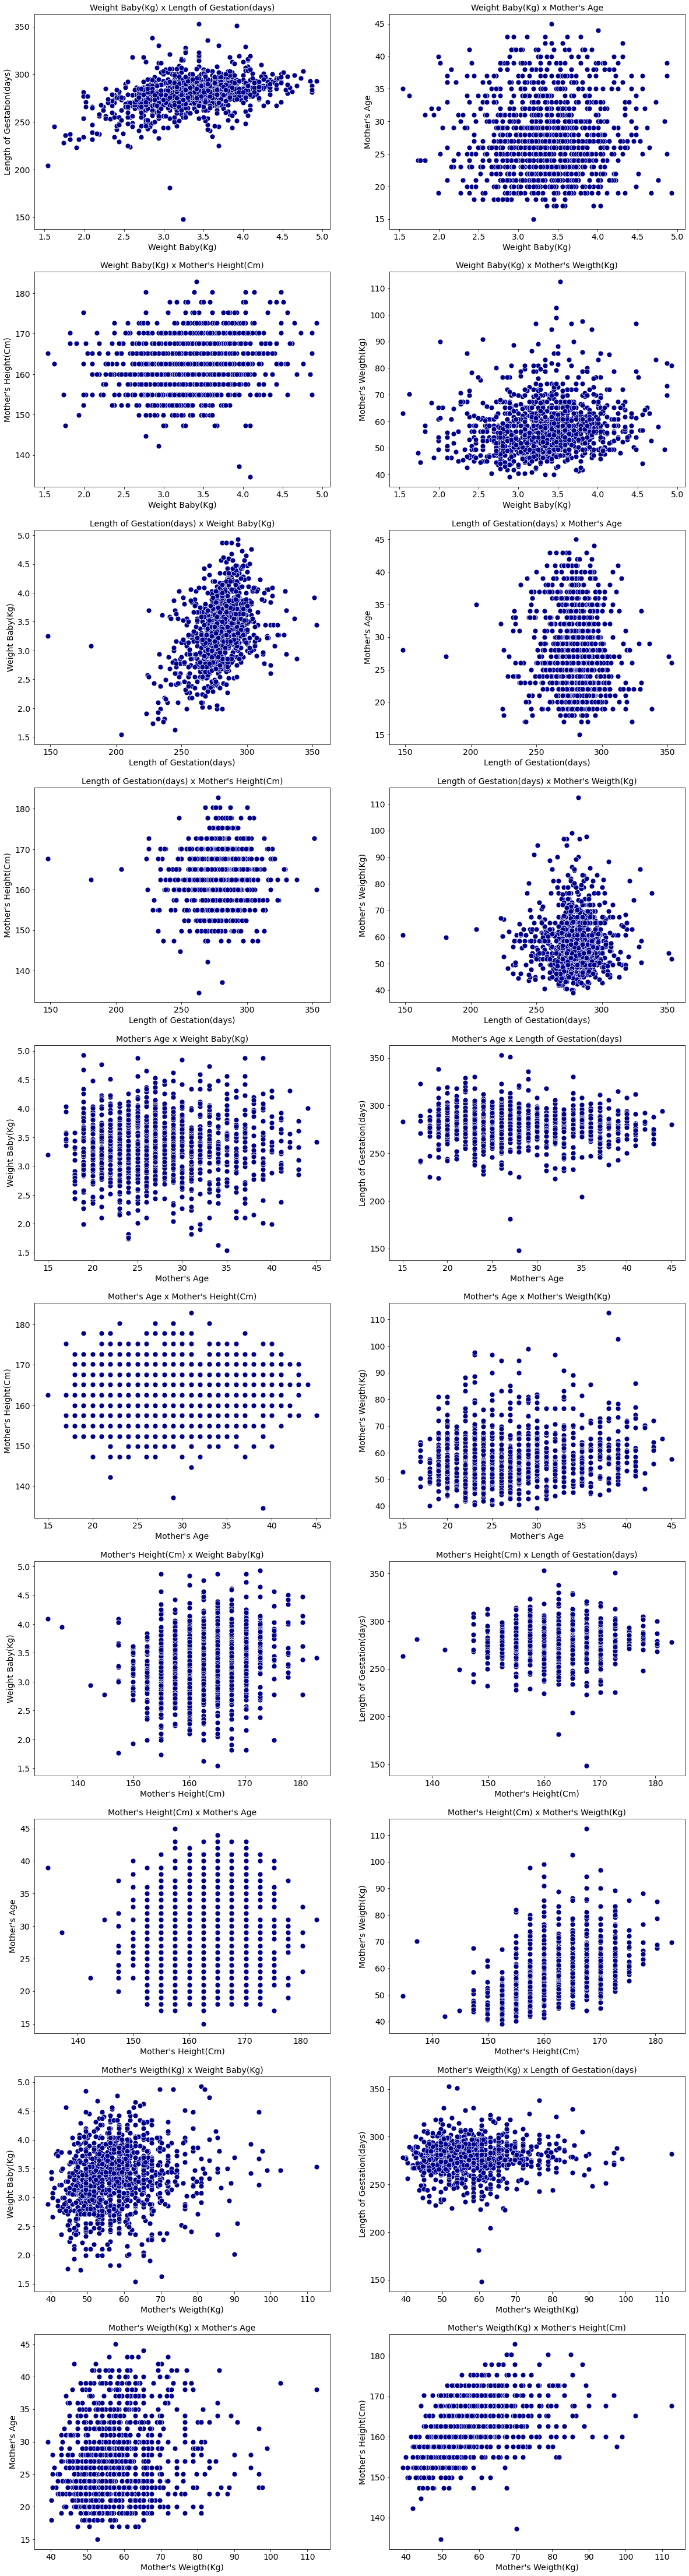

In [11]:
fig,ax = plt.subplots(len(babies.columns.drop(labels=[ 'Is The Mother a Smoker - Flag', 'Was the First Pegrancy - Flag', 'Was the First Pegrancy','Is The Mother a Smoker' ]))*2,2,figsize=(20,80))
i, j = 0,0
for x in babies.columns.drop(labels=[ 'Is The Mother a Smoker - Flag', 'Was the First Pegrancy - Flag', 'Was the First Pegrancy','Is The Mother a Smoker' ]):
    for y in babies.columns.drop(labels=[ 'Is The Mother a Smoker - Flag', 'Was the First Pegrancy - Flag', 'Was the First Pegrancy','Is The Mother a Smoker' ]):
        if x!=y:
            sns.scatterplot(x=x,y=y,data=babies,s=80,ax=ax[i][j],color="darkblue")
            ax[i][j].set_xlabel('{}'.format(x),fontsize=14)
            ax[i][j].set_ylabel('{}'.format(y),fontsize=14)
            ax[i][j].set_title('{} x {}'.format(x,y),fontsize=14)
            if(j==0):
                j=1
            else:
                j=0
                i+=1
plt.show()

### ========================================================================================

# PERGUNTAS

### O objetivo principal desta seção é responder algumas perguntas, usando os dados pré-processados como veículo para tal ação


#### Definindo função para plotar o gráfico de predição a partir de regressão linear, o que pode ou não ser eficiente dependendo da força da correlação entre as variáveis analisadas

In [12]:
def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()
    
def regression(col1,col2):
    babies_na = babies.dropna(subset=[col1, col2 ])

    result = linregress(babies_na[col1],babies_na[col2])
    a = result.slope
    b = result.intercept
    show_regression(babies_na[col1],babies_na[col2], a, b)

### Para começar a exploração inicial dos dados foram decididas algumas perguntas que deveriam ser respondidas. Cada questão e sua resposta a seguir:

## 1º PERGUNTA:

#### Quantos bebês de mães fumantes tiveram o peso de nascimento abaixo da média?

In [13]:

media_peso_bebes = np.mean(babies["Weight Baby(Kg)"])


babies_bwt_smoke = babies[["Weight Baby(Kg)", "Is The Mother a Smoker"]]

cont_babies_mom_smoker = 0

for i in range(len(babies)):
    
    if(babies_bwt_smoke.iloc[i,1] == "Yes"):
        if(babies_bwt_smoke.iloc[i,0] < media_peso_bebes):
            cont_babies_mom_smoker += 1
        
        else:
            continue
    
    else:
        continue


print(" {} bebês de mães fumantes nasceram com o peso abaixo da média." .format(cont_babies_mom_smoker))

 302 bebês de mães fumantes nasceram com o peso abaixo da média.


## 2º PERGUNTA:

#### Quantas mães com a idade abaixo da média tiveram sua primeira gravidez?

In [14]:

media_idade_maes = np.mean(babies["Mother's Age"])

babies_idade_gravidez = babies[["Was the First Pegrancy", "Mother's Age"]]

cont_idade_gravidez = 0

for i in range(len(babies)):
    
    if(babies_idade_gravidez.iloc[i,0] == "Yes"):
        if(babies_idade_gravidez.iloc[i,1] < media_idade_maes):

            cont_idade_gravidez +=1
            
        else:
            continue
    else:
        continue
            
print("{} mães com a idade abaixo da média tiveram sua primeira gravidez." .format(cont_idade_gravidez))






455 mães com a idade abaixo da média tiveram sua primeira gravidez.


## 3º PERGUNTA:

#### Quantos bebês nasceram prematuramente? Levando em consideração que um bebê considerado prematuro nasce antes da 37ª semana de gestação.

In [15]:
prematuro_media_dias = 37*7

babies_gestation_indays = babies[["Length of Gestation(days)"]]

cont_babies_prematuros = 0

for i in range(len(babies)):
    
    if(babies_gestation_indays.iloc[i,0] < prematuro_media_dias):
        cont_babies_prematuros += 1
    
    else:
        continue

print("{} bebês nasceram prematuramente." .format(cont_babies_prematuros))

97 bebês nasceram prematuramente.


## 4º PERGUNTA:


#### Qual a relação entre o peso ao nascer e a duração da gestação?


A correlação entre o peso ao nascer e a duração da gestação é: 0.41
A correlação entre o peso ao nascer e a duração da gestação de mães fumantes é: nan
A correlação entre o peso ao nascer e a duração da gestação de mães não fumantes é: 0.41


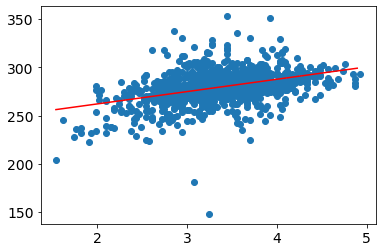

In [16]:
print('A correlação entre o peso ao nascer e a duração da gestação é: {}'.format(round(babies['Weight Baby(Kg)'].corr(babies['Length of Gestation(days)']),2)))
print('A correlação entre o peso ao nascer e a duração da gestação de mães fumantes é: {}'.format(round(babies[babies['Is The Mother a Smoker - Flag']==1]['Weight Baby(Kg)'].corr(babies[babies['Is The Mother a Smoker - Flag']==1]['Length of Gestation(days)']),2)))
print('A correlação entre o peso ao nascer e a duração da gestação de mães não fumantes é: {}'.format(round(babies[babies['Is The Mother a Smoker - Flag']==0]['Weight Baby(Kg)'].corr(babies[babies['Is The Mother a Smoker - Flag']==0]['Length of Gestation(days)']),2)))
regression('Weight Baby(Kg)','Length of Gestation(days)')

## 5º PERGUNTA:


#### Qual a correlação entre o peso do bebê ao nascer e o peso da mãe?


A correlação entre o peso ao nascer e a duração da gestação é: 0.15


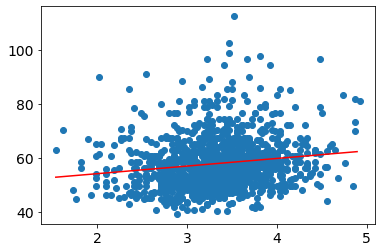

In [17]:
print('A correlação entre o peso ao nascer e a duração da gestação é: {}'.format(round(babies['Weight Baby(Kg)'].corr(babies["Mother's Weigth(Kg)"]),2)))
regression('Weight Baby(Kg)',"Mother's Weigth(Kg)")

## 6º PERGUNTA:


#### Qual a relação entre o peso da mãe e o tempo de gestação?


A correlação entre o tempo de gestação e o peso da mãe é: -0.06


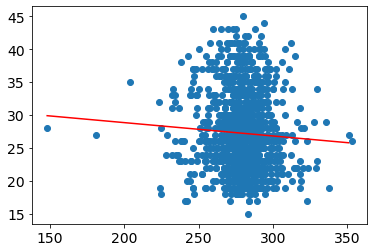

In [18]:
print('A correlação entre o tempo de gestação e o peso da mãe é: {}'.format(round(babies['Length of Gestation(days)'].corr(babies["Mother's Age"]),2)))
regression('Length of Gestation(days)',"Mother's Age")

## 7º PERGUNTA:


#### Qual a relação entre o tempo de gestação e a idade da mãe? 


A correlação entre o tempo de gestação e o peso da mãe é: 0.02


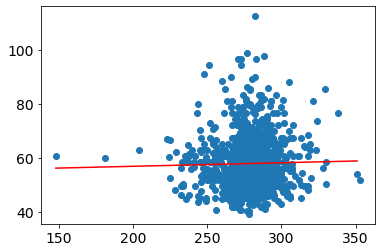

In [19]:
print('A correlação entre o tempo de gestação e o peso da mãe é: {}'.format(round(babies['Length of Gestation(days)'].corr(babies["Mother's Weigth(Kg)"]),2)))
regression('Length of Gestation(days)',"Mother's Weigth(Kg)")

### ========================================================================================


# CONCLUSÃO


#### Primeiramente, foi feito o Pré-processamento, ou seja, a limpeza e transformação dos dados com o intuito de facilitar a compreensão dos mesmos; algumas transformações como "ounces" para "quilos" e os números binários 0 e 1 para "No" e "Yes", respectivamente, foram feitas com esse intuito.


#### Com a Análise Exploratória dos Dados é possível compreender melhor alguns resultados encontrados ao plotar os gráficos como: se a mãe é fumante ou não, e o tempo de gestação. Os gráficos ajudam a otimizar os resultados e observar melhor a correlação que alguns podem apresentar entre si. Além disso, é importante perceber como foi feita a visualização dos dados por meio dos gráficos, de uma maneira que possa ser fácil compreender e para isso utilizamos os gráficos de barras e gráficos de dispersão que são importantes principalmente para visualizar as correlações.


#### Com os dados disponíveis é possível responder algumas perguntas interessantes como: "Quantas mães com a idade abaixo da média tiveram sua primeira gravidez?". Além disso, alguns resultados se tornam importante pelo fato de conter informações que podem ser usadas para a saúde do bebê e da mãe que podem ser aproveitados para a melhoria dos mesmos. É possível ainda fazer perguntas de correlação e observar os gráficos para entender melhor.


#### Algumas limitações encontradas nesse trabalho foi o fato do dataset ser antigo, feito por volta de 1960, ou seja, alguns objetivos seriam impossíveis de antingir e algumas perguntas não poderiam ser respondidas com tanta facilidade; não foi possível aplicar todo o conhecimento adquirido na disciplina pois alguns dados e grandezas do dataset limitaram o uso de certas aplicações. Algumas melhorias que poderiam ser feitas seriam encontrar dados recentes e os correlacionar com os usados nesse trabalho de forma que algumas perguntas possam ser respondidas; com mais estudo seria possível ter quebrado certas limitações citadas anteriormente e ter feito uma melhor exploração e análise dos dados. Para um trabalho futuro seria importante juntar ambos os datasets (antigo e novo) e observar como isso mudou e afetou a saúde do bebê e da mãe ao longo de todos esses anos e o que poderia ser feito para mudar.